### 0. Introduction YOLOv8

YOLOv8 được chứa trong thư viện ultralytics.

Object detection: là một hình vuông chứ đối tượng và label của đối tượng.

Object detection có 2 bài toán con:
+ 1: Object localization: bounding box.
Có rất nhiều cách xác định nhưng với YOLOv8 thì có format (x_center, y_center, width, height)

+ 2: Object classification.

0.99 là confidence score.

### 1. Dowload and import library

In [1]:
# Tải YOLOv8 thuộc thư viện ultralytics.
%pip install ultralytics
import ultralytics
# kiểm tra xem cài được chưa
ultralytics.checks()

Ultralytics YOLOv8.2.20  Python-3.12.3 torch-2.3.0+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
Setup complete  (12 CPUs, 15.3 GB RAM, 170.3/237.2 GB disk)


In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install gdown
%pip install unzip

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
# thư viên truy cập các tác vụ hệ thống
import os
# thư viện để chuyển đổi file sao chép coppy xóa file
import shutil
# thư viện đọc file yaml
import yaml
# thư viện numpy
import numpy as np
# thư viện dùng để chỉnh sửa bảng
import pandas as pd

import cv2
import json
# thư viện để vẽ hình ảnh
import matplotlib.pyplot as plt

#thư viện chứa YOLO để train.
from ultralytics import YOLO
from PIL import Image
#thư viện chứa các phần như cắt file, thư viện các hàm logictis regressions
from sklearn.model_selection import train_test_split

### 2. Prepare YOLOv8 data

format của folder YOLOv8

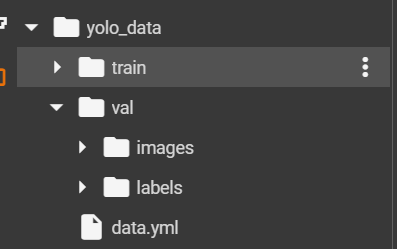

### 2.1. Đối với dữ liệu theo format YOLOv8

In [5]:
# download with gdown:
!gdown 1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31
#unzip
!unzip cars_yolo_data.zip

Downloading...
From (original): https://drive.google.com/uc?id=1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31
From (redirected): https://drive.google.com/uc?id=1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31&confirm=t&uuid=8b5654d1-60d9-4869-9965-52b4ddadf139
To: c:\Google drive\My Drive\CODESPACE\AIO\WARN_UP\10.WARN UP\cars_yolo_data.zip

  0%|          | 0.00/37.7M [00:00<?, ?B/s]
  1%|▏         | 524k/37.7M [00:00<00:38, 976kB/s]
  3%|▎         | 1.05M/37.7M [00:01<00:34, 1.05MB/s]
  4%|▍         | 1.57M/37.7M [00:01<00:27, 1.32MB/s]
  6%|▌         | 2.10M/37.7M [00:01<00:32, 1.10MB/s]
  7%|▋         | 2.62M/37.7M [00:02<00:36, 959kB/s] 
  8%|▊         | 3.15M/37.7M [00:03<00:36, 948kB/s]
 10%|▉         | 3.67M/37.7M [00:03<00:34, 986kB/s]
 11%|█         | 4.19M/37.7M [00:04<00:31, 1.07MB/s]
 12%|█▏        | 4.72M/37.7M [00:04<00:31, 1.04MB/s]
 14%|█▍        | 5.24M/37.7M [00:05<00:34, 948kB/s] 
 15%|█▌        | 5.77M/37.7M [00:05<00:31, 1.02MB/s]
 17%|█▋        | 6.29M/37.7M [00:06<00:28, 1.10MB/s]
 18%|█▊  

### 2.2. Đối với dữ liệu chưa theo format YOLOv8

In [30]:
# Tải file zip từ ggdrive
!gdown 1LHMGhIIemyjqCX4Wme87jsr_bUMg5Ewa

^C


Downloading...
From (original): https://drive.google.com/uc?id=1LHMGhIIemyjqCX4Wme87jsr_bUMg5Ewa
From (redirected): https://drive.google.com/uc?id=1LHMGhIIemyjqCX4Wme87jsr_bUMg5Ewa&confirm=t&uuid=22520408-8794-4458-a034-17a68e052064
To: c:\Google drive\My Drive\CODESPACE\AIO\WARN_UP\10.WARN UP\car_object_detection.zip

  0%|          | 0.00/118M [00:00<?, ?B/s]
  0%|          | 524k/118M [00:00<01:16, 1.53MB/s]
  1%|          | 1.05M/118M [00:00<01:21, 1.42MB/s]
  1%|▏         | 1.57M/118M [00:01<01:31, 1.26MB/s]
  2%|▏         | 2.10M/118M [00:01<01:32, 1.25MB/s]
  2%|▏         | 2.62M/118M [00:02<01:36, 1.19MB/s]
  3%|▎         | 3.15M/118M [00:02<01:31, 1.25MB/s]
  3%|▎         | 3.67M/118M [00:02<01:34, 1.20MB/s]
  4%|▎         | 4.19M/118M [00:03<01:28, 1.28MB/s]
  4%|▍         | 4.72M/118M [00:03<01:29, 1.27MB/s]
  4%|▍         | 5.24M/118M [00:04<01:30, 1.24MB/s]
  5%|▍         | 5.77M/118M [00:04<01:28, 1.26MB/s]
  5%|▌         | 6.29M/118M [00:05<01:31, 1.21MB/s]
  6%|▌       

In [26]:
%pip install unzip

Note: you may need to restart the kernel to use updated packages.


In [33]:
# Unzip file
!unzip car_object_detection.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [35]:
train_data_dir = './data/training_images'
label_filepath = './data/train_solution_bounding_boxes (1).csv'

df = pd.read_csv(label_filepath)
df

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422
...,...,...,...,...,...
554,vid_4_9860.jpg,0.000000,198.321729,49.235251,236.223284
555,vid_4_9880.jpg,329.876184,156.482351,536.664239,250.497895
556,vid_4_9900.jpg,0.000000,168.295823,141.797524,239.176652
557,vid_4_9960.jpg,487.428988,172.233646,616.917699,228.839864


In [36]:
pil_img = Image.open('./data/testing_images/vid_5_25100.jpg')
img_w, img_h = pil_img.size

#format cua YOLO : x_center, y_center, width, heigh
# convert (x_min, y_min, x_max, y_max) => ( x_center, y_center, width, heigh)

df['class'] = 0
df.rename(columns={'image': 'image_name'}, inplace = True)

df['x_center'] = (df['xmin'] + df['xmax'])/2
df['y_center'] = (df['ymin'] + df['ymax'])/2
df['bbox_w'] = df['xmax'] - df['xmin']
df['bbox_h'] = df['ymax'] - df['ymin']

#chuẩn hóa dữ liệu
df['x_center'] = df['x_center'] / img_w
df['y_center'] = df['y_center'] / img_h
df['bbox_w'] = df['bbox_w'] / img_w
df['bbox_h'] = df['bbox_h'] / img_h

class_label = ['car']
yolo_df = df[['image_name','class','x_center','y_center', 'bbox_w' , 'bbox_h']]
yolo_df


,image_name,class,x_center,y_center,bbox_w,bbox_h
0,vid_4_1000.jpg,0,0.450434,0.539817,0.068741,0.095238
1,vid_4_10000.jpg,0,0.100217,0.557191,0.155572,0.129987
2,vid_4_10040.jpg,0,0.444645,0.543678,0.181621,0.157014
3,vid_4_10020.jpg,0,0.833213,0.531451,0.197540,0.155727
4,vid_4_10060.jpg,0,0.110347,0.559122,0.171491,0.136422
...,...,...,...,...,...,...
554,vid_4_9860.jpg,0,0.036417,0.571770,0.072833,0.099741
555,vid_4_9880.jpg,0,0.640932,0.535500,0.305899,0.247409
556,vid_4_9900.jpg,0,0.104880,0.536148,0.209760,0.186528
557,vid_4_9960.jpg,0,0.816824,0.527728,0.191551,0.148964


### 3. Train , val, test split


In [37]:
seed = 0
val_size = 0.14
is_shuffle = True

train_data, val_data = train_test_split(
    yolo_df,
    test_size = val_size,
    random_state = seed,
    shuffle = is_shuffle
)

### 4. Save Data

In [38]:
def save_data(df, src_img_dr, save_dir):
    # Create folder if not exists
    os.makedirs(save_dir, exist_ok=True)

    # Make images and labels folder
    os.makedirs(os.path.join(save_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(save_dir, 'labels'), exist_ok=True)

    yolo_labels = []

    for idx, row in df.iterrows():
        img_name = row['image_name']
        class_id = row['class']
        x_center = row['x_center']
        y_center = row['y_center']
        bbox_w = row['bbox_w']
        bbox_h = row['bbox_h']

        img_path = os.path.join(src_img_dr, img_name)

        # Copy image to image folder
        # print(src_img_dr)
        # print(save_dir)
        shutil.copy(
            os.path.join(img_path),
            os.path.join(save_dir, 'images'))

        img_name = os.path.splitext(img_name)[0]
        label = f'{class_id} {x_center} {y_center} {bbox_w} {bbox_h}'
        yolo_labels.append((img_name, label))
    for img_name, label in yolo_labels:
        with open(os.path.join(save_dir, 'labels', f"{img_name}.txt"), 'w') as f:
            f.write(f"{label}\n")

In [39]:
save_yolo_data_dir = './yolo_data'
os.makedirs(save_yolo_data_dir, exist_ok=True)
save_train_dir = os.path.join(save_yolo_data_dir, 'train')
save_val_dir = os.path.join(save_yolo_data_dir, 'val')

save_data(train_data, train_data_dir, save_train_dir)
save_data(val_data, train_data_dir, save_val_dir)


### 5. Create yaml file

In [52]:
data_yaml = {
    'path' : 'C:/Google drive/My Drive/CODESPACE/AIO/WARN_UP/10.WARN UP/yolo_data', ## dương dan tuyet doi den folder yolo_data
    'train' : 'train/images',
    'test': 'test/images',
    'val': 'val/images',
    'nc': 1,
    'names': class_label
}

yolo_yaml_path = os.path.join(
    save_yolo_data_dir,
    'data.yml'
)

with open(yolo_yaml_path,"w") as f:
    yaml.dump(data_yaml, f, default_flow_style = False)

### 6. Train Data

In [ ]:
import matplotlib.pyplot as plt

from ultralytics import YOLO
#load model
yolo_yaml_path = './yolo_data/data.yml'
model = YOLO('yolov8s.yaml').load('./yolov8s.pt')

#set up some important parameter
epochs = 15 # coi thu train lap lai bao nhiu lan
imgsz = 640
batch_size = 8
patience = 5
lr = 0.0005

#start straining (fine tuning)
results = model.train (
    data = yolo_yaml_path,
    epochs =epochs,
    imgsz =imgsz,
    batch = batch_size,
    lr0 =lr,
    patience = patience,
    project ='./models',
    name ='./yolov8/detect/train'
)

In [ ]:
#evaluate model
model_path = '/content/models/yolov8/detect/train/weights/best.pt'
model = YOLO(model_path)

metrics = model.val(
    project='models',
    name='yolov8/detect/val'
)

In [ ]:
#use model
model_path = '/content/models/yolov8/detect/train/weights/best.pt'
test_img = 'https://www.youtube.com/watch?v=So2ift8WR-c'
model = YOLO(model_path)
model_pre = model.predict(test_img, save = True)